In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

In [4]:
uri = "bolt://localhost:7687"  # replace with your Neo4j instance
driver = GraphDatabase.driver(uri, auth = ("neo4j", "adamfel7070"))  # replace with your credentials

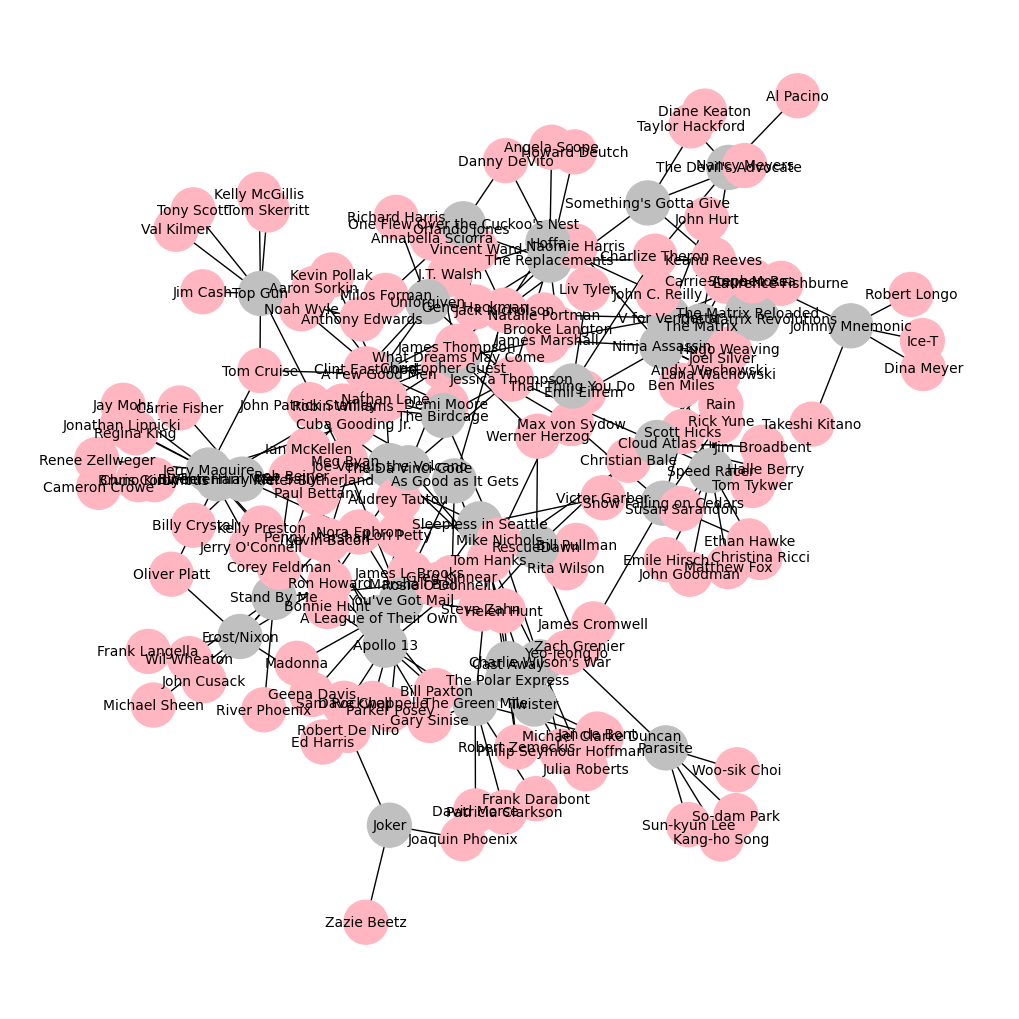

In [21]:
def get_data(driver):
    with driver.session() as session:
        results = session.run("""
            MATCH (person:Person)-[relatedTo]->(movie:Movie)
            RETURN person.name, TYPE(relatedTo), movie.title
        """)

        # Convert the result to a list so we can iterate over it multiple times
        results = list(results)

    return results


def create_graph(data):
    G = nx.Graph()

    for record in data:
        person = record["person.name"]
        movie = record["movie.title"]
        relationship = record["TYPE(relatedTo)"]

        G.add_node(person, label = "Person")
        G.add_node(movie, label = "Movie")
        G.add_edge(person, movie, label = relationship)

    return G


def visualize_graph(G):
    pos = nx.spring_layout(G, k=0.2)
    labels = {node: node for node in G.nodes()}
    
    # Create a color map
    color_map = []
    for node in G:
        if G.nodes[node]['label'] == 'Person':
            color_map.append('#FFB6C1') 
        else: 
            color_map.append('#C0C0C0') 

    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, labels=labels, with_labels=True, font_size=10, node_size=1000, node_color=color_map)
    plt.show()

data = get_data(driver)
G = create_graph(data)
visualize_graph(G)